### Jupyter notebook about retail stocks performance in Brazilian market!

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Ativos do varejo do mercado brasileiro

In [2]:
ativos = ['VIIA3','MGLU3', 'LREN3', 'GUAR3', 'CEAB3', 'ARZZ3'] #PCAR3

In [3]:
ativos = [i + '.SA' for i in ativos]

In [4]:
inicio = '2022-02-01'
#fim = '2023-08-17'
yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yest= yesterday.strftime('%Y-%m-%d')
yest

'2023-09-10'

In [5]:
df = yf.download(ativos, start = inicio, end = yest)['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [6]:
df.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,PCAR3.SA,VIIA3.SA
Date,,,,,,,
2023-09-01,73.690002,5.62,6.74,16.770000,2.86,4.92,1.29
2023-09-04,73.519997,5.48,6.85,16.440001,2.78,4.95,1.26
2023-09-05,71.830002,5.42,6.66,16.070000,2.69,4.80,1.17
2023-09-06,68.870003,5.44,6.15,15.570000,2.59,4.66,1.20
2023-09-08,67.500000,5.32,5.99,15.520000,2.51,4.59,1.18


#### normalizando os ativos


In [7]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

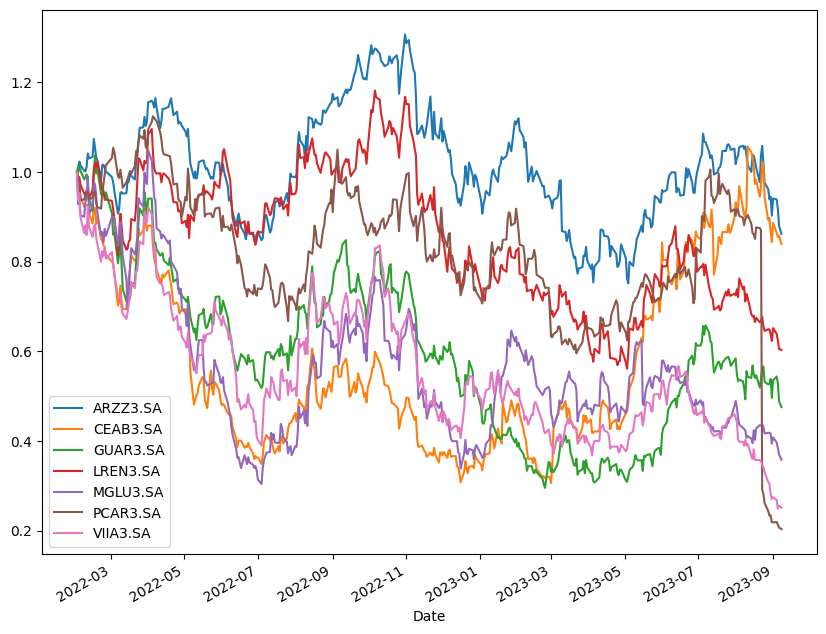

In [8]:
normalizado.plot(figsize = (10,8))

### Preços no dia do aporte

In [9]:
primeiro = df.iloc[0]

In [10]:
primeiro

ARZZ3.SA    78.317413
CEAB3.SA     6.340000
GUAR3.SA    12.600345
LREN3.SA    25.734549
MGLU3.SA     7.010000
PCAR3.SA    22.571108
VIIA3.SA     4.700000
Name: 2022-02-01 00:00:00, dtype: float64

In [11]:
#qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [12]:
comprados = 10000/primeiro

In [13]:
comprados

ARZZ3.SA     127.685525
CEAB3.SA    1577.287028
GUAR3.SA     793.629085
LREN3.SA     388.582686
MGLU3.SA    1426.533477
PCAR3.SA     443.044270
VIIA3.SA    2127.659661
Name: 2022-02-01 00:00:00, dtype: float64

In [14]:
# Número de papéis arredondados
round(comprados, 0)

ARZZ3.SA     128.0
CEAB3.SA    1577.0
GUAR3.SA     794.0
LREN3.SA     389.0
MGLU3.SA    1427.0
PCAR3.SA     443.0
VIIA3.SA    2128.0
Name: 2022-02-01 00:00:00, dtype: float64

In [15]:
comprados = round(comprados, 0)

In [16]:
comprados

ARZZ3.SA     128.0
CEAB3.SA    1577.0
GUAR3.SA     794.0
LREN3.SA     389.0
MGLU3.SA    1427.0
PCAR3.SA     443.0
VIIA3.SA    2128.0
Name: 2022-02-01 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [17]:
PL = df*comprados
#PL=df*qntd

In [18]:
PL.head()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,PCAR3.SA,VIIA3.SA
Date,,,,,,,
2022-02-01,10024.628906,9998.180241,10004.673658,10010.739393,10003.270327,9999.000784,10001.599594
2022-02-02,10133.377930,9793.170060,9996.858418,9866.032978,9289.770327,9837.795959,9363.200203
2022-02-03,10255.719727,9651.239820,10145.364653,9895.715775,9318.310299,9785.513496,9533.440041
2022-02-04,10170.450195,9446.229639,10028.123167,9721.326563,9032.909891,9371.612072,8980.159554
2022-02-07,10053.050781,9225.449850,9840.534670,9532.093727,9004.369918,9384.682688,8639.679878


In [19]:
PL.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,PCAR3.SA,VIIA3.SA
Date,,,,,,,
2023-09-01,9432.320312,8862.739820,5351.559818,6523.530178,4081.219850,2179.560034,2745.119919
2023-09-04,9410.559570,8641.960030,5438.899924,6395.160208,3967.059959,2192.849916,2681.279980
2023-09-05,9194.240234,8547.340120,5288.039879,6251.229881,3838.630082,2126.400084,2489.759909
2023-09-06,8815.360352,8578.880090,4883.100076,6056.729881,3695.929878,2064.379932,2553.600101
2023-09-08,8640.000000,8389.640271,4756.059818,6037.280178,3581.769986,2033.370068,2511.039888


In [20]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [21]:
#PL.head()
PL.tail()

,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,PCAR3.SA,VIIA3.SA,PL Total
Date,,,,,,,,
2023-09-01,9432.320312,8862.739820,5351.559818,6523.530178,4081.219850,2179.560034,2745.119919,39176.049931
2023-09-04,9410.559570,8641.960030,5438.899924,6395.160208,3967.059959,2192.849916,2681.279980,38727.769587
2023-09-05,9194.240234,8547.340120,5288.039879,6251.229881,3838.630082,2126.400084,2489.759909,37735.640190
2023-09-06,8815.360352,8578.880090,4883.100076,6056.729881,3695.929878,2064.379932,2553.600101,36647.980310
2023-09-08,8640.000000,8389.640271,4756.059818,6037.280178,3581.769986,2033.370068,2511.039888,35949.160209


In [22]:
ibov = yf.download('^BVSP', start = inicio, end = yest)

[*********************100%***********************]  1 of 1 completed


In [23]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,112143.0,113302.0,112135.0,113147.0,113147.0,11133300
2022-02-02,113228.0,113666.0,111645.0,112161.0,112161.0,11751200
2022-02-03,111897.0,112502.0,111225.0,111696.0,111696.0,11039700
2022-02-04,111696.0,112415.0,110321.0,112245.0,112245.0,0
2022-02-07,112247.0,112517.0,111490.0,111996.0,111996.0,10672800


In [24]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [25]:
ibov = ibov[['Ibov']]

In [26]:
ibov

,Ibov
Date,
2022-02-01,113147.0
2022-02-02,112161.0
2022-02-03,111696.0
2022-02-04,112245.0
2022-02-07,111996.0
...,...
2023-09-01,117893.0
2023-09-04,117777.0
2023-09-05,117331.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [27]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [28]:
novo_df.head()

,Ibov,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,PCAR3.SA,VIIA3.SA,PL Total
Date,,,,,,,,,
2022-02-01,113147.0,10024.628906,9998.180241,10004.673658,10010.739393,10003.270327,9999.000784,10001.599594,70042.092903
2022-02-02,112161.0,10133.377930,9793.170060,9996.858418,9866.032978,9289.770327,9837.795959,9363.200203,68280.205874
2022-02-03,111696.0,10255.719727,9651.239820,10145.364653,9895.715775,9318.310299,9785.513496,9533.440041,68585.303810
2022-02-04,112245.0,10170.450195,9446.229639,10028.123167,9721.326563,9032.909891,9371.612072,8980.159554,66750.811081
2022-02-07,111996.0,10053.050781,9225.449850,9840.534670,9532.093727,9004.369918,9384.682688,8639.679878,65679.861512


<Axes: xlabel='Date'>

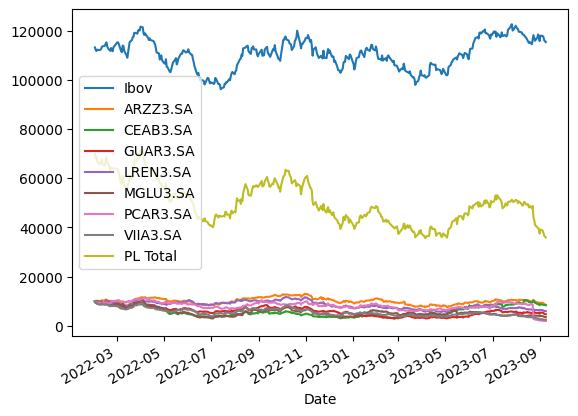

In [29]:
novo_df.plot()

In [30]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [31]:
novo_normalizado

,Ibov,ARZZ3.SA,CEAB3.SA,GUAR3.SA,LREN3.SA,MGLU3.SA,PCAR3.SA,VIIA3.SA,PL Total
Date,,,,,,,,,
2022-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2022-02-02,99.128567,101.084818,97.949525,99.921884,98.554488,92.867333,98.387791,93.617027,97.484531
2022-02-03,98.717597,102.305231,96.529964,101.406253,98.850998,93.152639,97.864914,95.319153,97.920123
2022-02-04,99.202807,101.454630,94.479489,100.234386,97.108976,90.299568,93.725486,89.787233,95.300994
2022-02-07,98.982739,100.283520,92.271290,98.359377,95.218678,90.014262,93.856205,86.382981,93.771986
...,...,...,...,...,...,...,...,...,...
2023-09-01,104.194543,94.091466,88.643529,53.490599,65.165318,40.798856,21.797778,27.446809,55.932152
2023-09-04,104.092022,93.874393,86.435329,54.363592,63.882996,39.657630,21.930691,26.808512,55.292136
2023-09-05,103.697844,91.716515,85.488958,52.855696,62.445236,38.373751,21.266126,24.893617,53.875661


<Axes: xlabel='Date'>

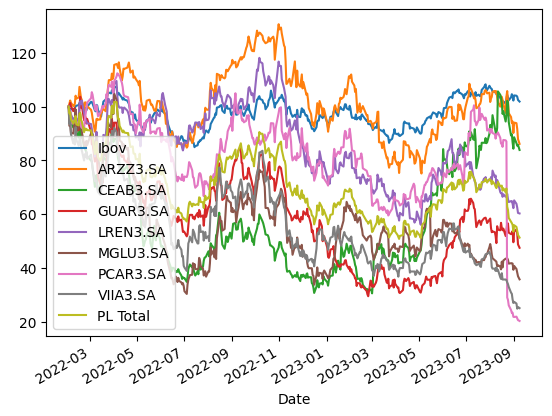

In [32]:
novo_normalizado.plot()

<Axes: >

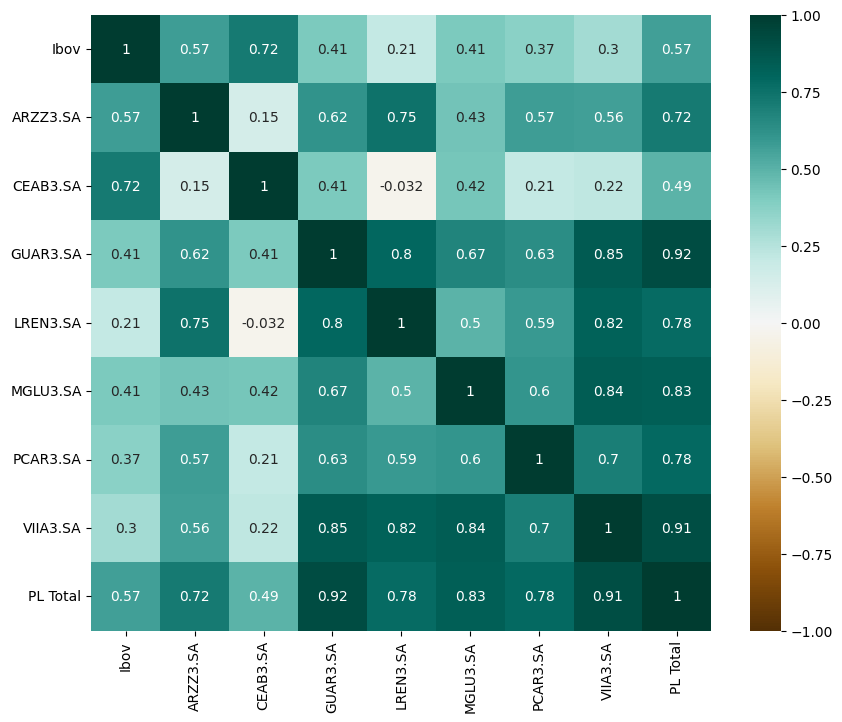

In [33]:
plt.figure(figsize = (10,8))

sns.heatmap(novo_normalizado.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

<Axes: xlabel='Date'>

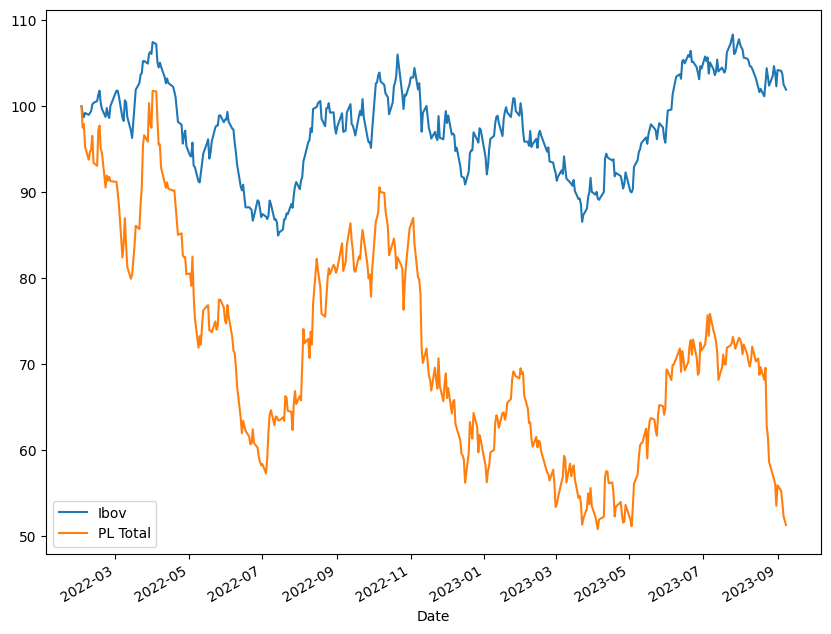

In [34]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (10,8))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [35]:
#retail ativos
ativos

['PCAR3.SA',
 'VIIA3.SA',
 'MGLU3.SA',
 'LREN3.SA',
 'GUAR3.SA',
 'CEAB3.SA',
 'ARZZ3.SA']